# Figure 2b. Representative simulation examples.

Representative simulation example highlighting a scenario which ColocBoost correctly resolves, but HyPrColoc misses true signals and admis false positives. 

In [2]:
setwd("/home/xc2270/COLOCBoost/MS_cases/MS_code/Fig2b/examples/")
for(file in list.files("/home/xc2270/COLOCBoost/code_COLOCBoost/colocboost_updating", full.names = T)) {source(file)}

## Heterogeneous effects for two causal variants

When analyzing multiple causal variants, it's important to consider that they may exhibit heterogeneous effects across different contexts, populations, or individuals. 

### ColocBoost identify two CoS including two true causal variants.

In [12]:
library(tidyverse)
data <- readRDS("Figure2b1.rds")
X <- data$X
Y <- data$Y
data$variant[[1]]

[1]  622 1275

In [4]:
res <- colocboost(X = X, Y = Y)
res$cos_details$cos$cos_index

Starting checking the input data.

Starting gradient boosting algorithm.

Boosting iterations for outcome 1 converge after 51 iterations!

Boosting iterations for outcome 2 converge after 56 iterations!

Starting assemble analyses and results summary.



$`cos1:y1_y2`
[1] 622

$`cos2:y1_y2`
 [1] 1293 1270 1288 1287 1305 1300 1275 1271 1273 1290 1291

In [5]:
res$cos_summary

,target_outcome,colocalized_outcomes,cos_id,purity,top_variable,top_variable_vcp,cos_npc,n_variables,colocalized_index,colocalized_variables,colocalized_variables_vcp
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,NA,Y1; Y2,cos1:y1_y2,1.0000000,chr3:112804473_CCTT_TCTT,0.9998783,0.9854634,1,622,chr3:112804473_CCTT_TCTT,0.999878302330088
2,NA,Y1; Y2,cos2:y1_y2,0.9947614,chr3:113083136_A_G,0.1366141,0.9676439,11,1293; 1270; 1288; 1287; 1305; 1300; 1275; 1271; 1273; 1290; 1291,chr3:113083136_A_G; chr3:113080115_G_GA; chr3:113082358_A_G; chr3:113081994_G_C; chr3:113086302_C_T; chr3:113085245_C_G; chr3:113081048_AT_A; chr3:113080553_T_C; chr3:113080703_A_C; chr3:113082509_T_A; chr3:113082597_T_C,0.136614052992149; 0.110658161838286; 0.110658161838286; 0.107074382866662; 0.101533545239383; 0.0999267536841275; 0.0637647280276862; 0.0590622913527449; 0.0590622913527449; 0.0590622913527449; 0.0590622913527449


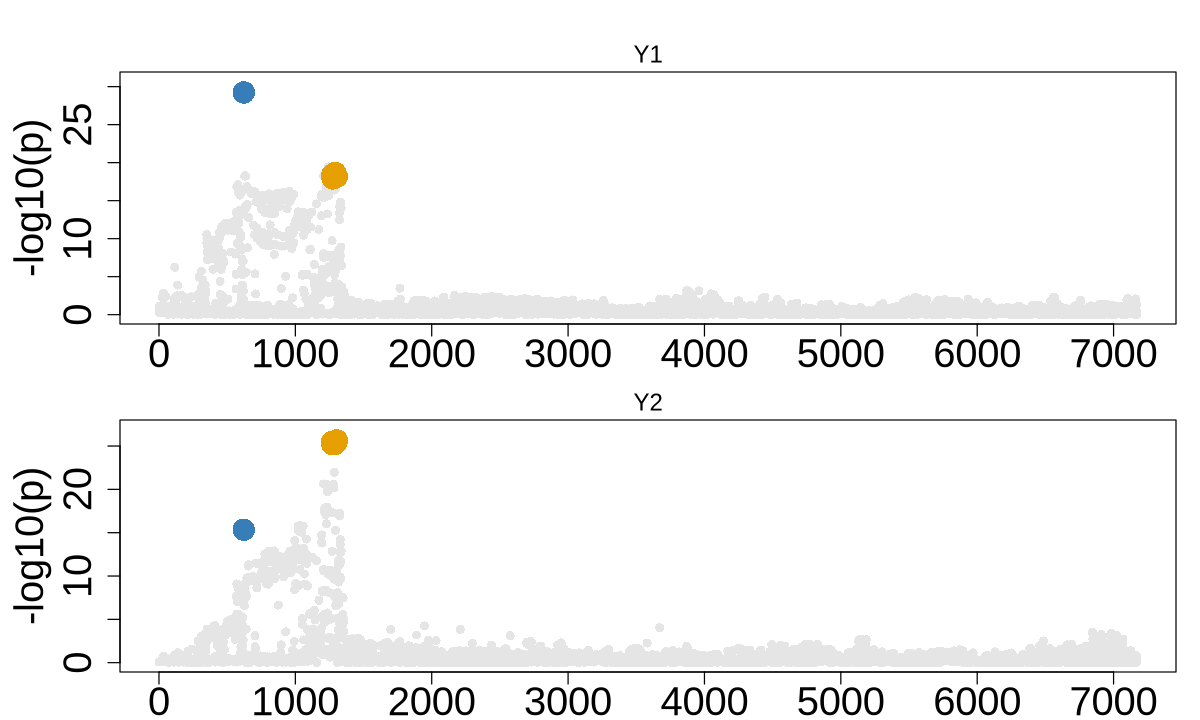

In [6]:
options(repr.plot.width = 10, repr.plot.height = 6)
colocboost_plot(res, plot_cols = 1)

### HyPrColoc

In [8]:
library(hyprcoloc)
betas = sebetas = matrix(NA, nrow = ncol(X), ncol = 2) 
for (i in 1:2){
    x <- scale(X)
    y <- scale(Y[,i])
    rr <- susieR::univariate_regression(x, y)
    betas[,i] = rr$betahat
    sebetas[, i] <- rr$sebetahat
}
traits <- c(1:2)
rsid <- paste0("snp", c(1:ncol(X)))
colnames(betas) <- colnames(sebetas) <- traits
rownames(betas) <- rownames(sebetas) <- rsid
res_hyprcoloc <- hyprcoloc(betas, sebetas, trait.names=traits, snp.id=rsid, snpscores = TRUE)

In [9]:
res_hyprcoloc$results

iteration,traits,posterior_prob,regional_prob,candidate_snp,posterior_explained_by_snp,dropped_trait
<dbl>,<chr>,<lgl>,<dbl>,<lgl>,<dbl>,<chr>
1,None,NA,1,NA,NA,1


### COLOC (one causal assumption)

In [16]:
library(coloc)
LD <- get_cormat(data$X)
colnames(LD) <- rownames(LD) <- 1:ncol(data$X)
MAF <- colMeans(data$X)/2 %>% as.numeric
D1 <- list("beta" = betas[,1], "varbeta" = sebetas[,1]^2,
           "N" = nrow(data$X), "sdY" = sd(unlist(data$Y[,1])),
           "type" = 'quant', "MAF" = MAF, "LD" = LD,
           "snp" = 1:ncol(data$X), "position" = 1:ncol(data$X))
D2 <- list("beta" = betas[,2], "varbeta" = sebetas[,2]^2,
           "N" = nrow(data$X), "sdY" = sd(unlist(data$Y[,2])),
           "type" = 'quant', "MAF" = MAF, "LD" = LD,
           "snp" = 1:ncol(data$X), "position" = 1:ncol(data$X))
my.res <- coloc.abf(dataset1=D1, dataset2=D2)

PP.H0.abf PP.H1.abf PP.H2.abf PP.H3.abf PP.H4.abf 
 1.52e-43  9.07e-21  1.67e-23  1.00e+00  2.67e-08 
[1] "PP abf for shared variant: 2.67e-06%"


### COLOC (V5)

In [17]:
library(susieR)
out_p <- runsusie(D1)
out_e <- runsusie(D2)
out_coloc = coloc.susie(out_e, out_p)

running max iterations: 100

	converged: TRUE

running max iterations: 100

	converged: TRUE



In [19]:
out_coloc$summary

nsnps,hit1,hit2,PP.H0.abf,PP.H1.abf,PP.H2.abf,PP.H3.abf,PP.H4.abf,idx1,idx2
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
7171,622,622,4.449045e-20,2.760137e-17,3.225755e-06,1.230759e-06,9.999955e-01,2,1
7171,1305,622,2.345981e-27,1.379226e-14,1.700940e-13,1.000000e+00,9.703266e-15,1,1
7171,622,1293,4.875114e-09,3.024466e-06,1.609233e-03,9.983500e-01,3.775247e-05,2,2
7171,1305,1293,1.474162e-20,8.666749e-08,4.866083e-15,2.666151e-02,9.733384e-01,1,2


In [21]:
o <- order(out_coloc$results$SNP.PP.H4.row1,decreasing=TRUE)
cs <- cumsum(out_coloc$results$SNP.PP.H4.row1[o])
w <- which(cs > 0.95)[1]
out_coloc$results[o,][1:w,]$snp

[1] "622"

In [22]:
o <- order(out_coloc$results$SNP.PP.H4.row4,decreasing=TRUE)
cs <- cumsum(out_coloc$results$SNP.PP.H4.row4[o])
w <- which(cs > 0.95)[1]
out_coloc$results[o,][1:w,]$snp

[1] "1293" "1287" "1270" "1288" "1305" "1300" "1275" "1271" "1273" "1290"
[11] "1291"

### MOLOC

In [30]:
library(moloc)
moloc_input <- lapply(1:2, function(cnt){
    tibble(SNP = 1:ncol(data$X), BETA = betas[,cnt],
           SE = sebetas[,cnt], N = nrow(data$X), MAF = MAF)
})
res_moloc <- moloc_test(listData = moloc_input)

Use default priors: 1e-04,1e-05

Mean estimated sdY from data1: 0.553204233945551

Mean estimated sdY from data2: 0.553272188049991

Use prior variances of 0.01 0.1 0.5

Use prior variances of 0.01 0.1 0.5

Best SNP per trait a: 622

Probability that trait a colocalizes with at least one other trait = 5e-08

Best SNP per trait b: 622

Probability that trait b colocalizes with at least one other trait = 5e-08

Best SNP per trait ab: 622

Probability that trait ab colocalizes with at least one other trait = 5e-08



In [31]:
res_moloc$priors_lkl_ppa

,prior,sumbf,logBF_locus,PPA
,<dbl>,<dbl>,<dbl>,<dbl>
a,1.00e-04,61.06967,52.19187,1.549906e-20
"a,b",1.00e-08,115.89352,98.13792,1.000000e+00
b,1.00e-04,54.82385,45.94605,3.004552e-23
ab,1.00e-05,92.16766,83.28986,4.965810e-08
zero,9.99e-01,0.00000,0.00000,4.656775e-43
